In [2]:
C4DvW5_0_sswvHjIjjDS
yz4fQiL721

NameError: name 'C4DvW5_0_sswvHjIjjDS' is not defined

In [ ]:
#  필요 모듈 읽어오기
import os
import sys
import requests
import json

# api 사용을 위한 개발자 정보
client_id = "C4DvW5_0_sswvHjIjjDS"
client_secret = "yz4fQiL721"

# 사용할 api 주소 선택
url = "https://openapi.naver.com/v1/vision/face"        # 얼굴감지
# url = "https://openapi.naver.com/v1/vision/celebrity"   # 유명인 얼굴인식

# 인식할 사진
files = {'image': open('love6.jpg', 'rb')}

# id secret을 headers 딕셔너리로 변환
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }

# 위 정보들을 모두 api주소로 전송하려 결과를 response로 받음
response = requests.post(url,  files=files, headers=headers)
                    #  (정보를 전달할 주소, 전달할 사진, 개발자 id secret)

rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, ensure_ascii = False))

print(type(parsed))

{"info":{"size":{"width":540,"height":675},"faceCount":1},"faces":[{"roi":{"x":186,"y":174,"width":180,"height":180},"landmark":{"leftEye":{"x":226,"y":212},"rightEye":{"x":308,"y":225},"nose":{"x":268,"y":275},"leftMouth":{"x":236,"y":320},"rightMouth":{"x":301,"y":319}},"gender":{"value":"male","confidence":0.999879},"age":{"value":"22~26","confidence":1.0},"emotion":{"value":"neutral","confidence":0.999999},"pose":{"value":"frontal_face","confidence":0.995273}}]}
{
    "info": {
        "size": {
            "width": 540,
            "height": 675
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 186,
                "y": 174,
                "width": 180,
                "height": 180
            },
            "landmark": {
                "leftEye": {
                    "x": 226,
                    "y": 212
                },
                "rightEye": {
                    "x": 308,
                    "y": 225
       

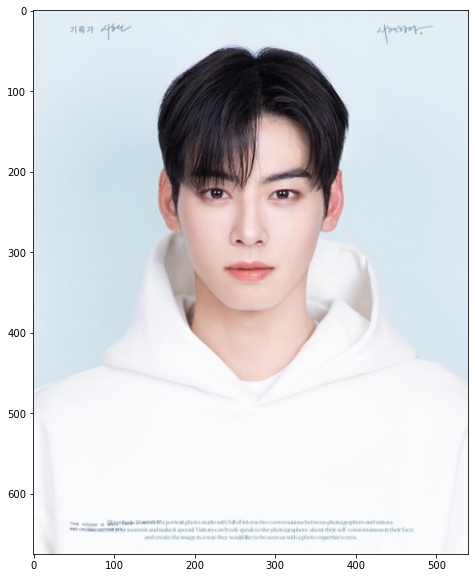

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('love6.jpg')

# 사진을 띄울 액자 설정
plt.figure(figsize=(10,10))
# 액자에 사진 넣기
plt.imshow(img)
# 액자 띄우기
plt.show()


In [ ]:
#####################################################
# 분석 결과 데이터 정리를 위한 파이썬 기본 문법
#####################################################

# dict
dict = {'Name':'차은우', 'Age':27, 'etc':['neutral','frontal_face']}

# 키값들만 출력
print(dict.keys())

# value값 들만 출력
print(dict.values())

# 키값을 이용한 밸류값 호출
print(dict['Name'])
print(dict.get('Name'))

print(dict.get('Gender'))           # 없는 키값을 호출하면 None이 나오고 에러가 발생하지 않는다.
print(dict['Gender'])               # 없는 키값을 호출하면 에러

print(dict.get('Gender','값이 없음'))    # 없을 때의 출력 메세지까지 지정할 수 있다.




dict_keys(['Name', 'Age', 'etc'])
dict_values(['차은우', 27, ['neutral', 'frontal_face']])
차은우
차은우
None


KeyError: 'Gender'

In [ ]:
##########################적용###########################

parsed['faces']
# 처음 보낸 사진은 얼굴이 하나라서 한명의 정보 리스트만 볼 수 있다.

parsed['faces'][0]
parsed['faces'][0]['roi']   # 사진에서의 얼굴 정보값
parsed['faces'][0]['gender']   # 사진에서의 얼굴 정보값
parsed['faces'][0]['age']   # 사진에서의 얼굴 정보값
parsed['faces'][0]['emotion']   # 사진에서의 얼굴 정보값

print(parsed['faces'][0]['roi'])
print(parsed['faces'][0]['gender'])
print(parsed['faces'][0]['age'])
print(parsed['faces'][0]['emotion'])


{'x': 186, 'y': 174, 'width': 180, 'height': 180}
{'value': 'male', 'confidence': 0.999879}
{'value': '22~26', 'confidence': 1.0}
{'value': 'neutral', 'confidence': 0.999999}


In [ ]:
# 전체 정보 종합 추출

x, y, w, h = parsed['faces'][0]['roi'].values()     # 딕셔너리는 기본적으로 순서가 없다. unordered
gender, gender_c = parsed['faces'][0]['gender'].values()     # 딕셔너리는 기본적으로 순서가 없다. unordered
age, age_c = parsed['faces'][0]['age'].values()     # 딕셔너리는 기본적으로 순서가 없다. unordered
emotion, emotion_c = parsed['faces'][0]['emotion'].values()     # 딕셔너리는 기본적으로 순서가 없다. unordered

print(x)
print(emotion)
print(gender)
print(age)

# values()를 이용하여 값만 추출해서 그 값들의 개수에 맞게 변수로 받아 저장해주었다.
# 딕셔너리 특성상 순서가 다르게 나올 수 있으므로 한 번은 확인해야 한다.


186
neutral
male
22~26


In [ ]:
# 추출한 정보를 사진에 올리기 적합한 형태로 가공하자.

annot = gender + ' : ' + str(gender_c*100) +'%' + \
        '\n'+ emotion + ' : ' + str(emotion_c*100)+'%' + \
        '\n'+ age + ' : ' + str(age_c*100)+'%' + \
        '\n'

print(annot)



male : 99.9879%
neutral : 99.9999%
22~26 : 100.0%



{"info":{"size":{"width":1200,"height":800},"faceCount":1},"faces":[{"roi":{"x":519,"y":171,"width":277,"height":277},"landmark":{"leftEye":{"x":604,"y":220},"rightEye":{"x":729,"y":224},"nose":{"x":685,"y":296},"leftMouth":{"x":616,"y":375},"rightMouth":{"x":708,"y":377}},"gender":{"value":"female","confidence":0.986753},"age":{"value":"23~27","confidence":0.561886},"emotion":{"value":"neutral","confidence":0.999276},"pose":{"value":"frontal_face","confidence":0.967272}}]}
female : 98.6753%
neutral : 99.92760000000001%
23~27 : 56.1886%



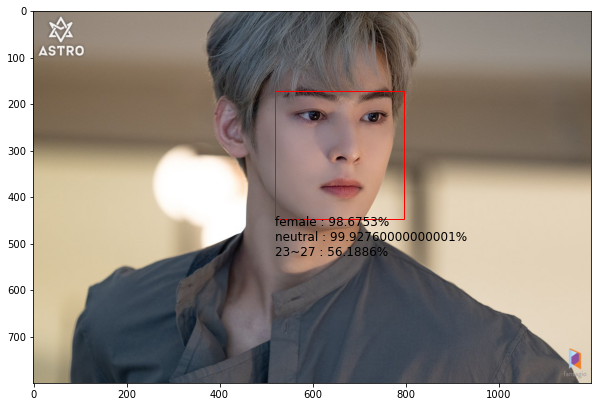

In [ ]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#  필요 모듈 읽어오기
import os
import sys
import requests
import json

# api 사용을 위한 개발자 정보
client_id = "C4DvW5_0_sswvHjIjjDS"
client_secret = "yz4fQiL721"

# 사용할 api 주소 선택
# url = "https://openapi.naver.com/v1/vision/face"        # 얼굴감지
url = "https://openapi.naver.com/v1/vision/celebrity"   # 유명인 얼굴인식

# 인식할 사진
file_name = 'love5.jpg'
files = {'image': open(file_name, 'rb')}

# id secret을 headers 딕셔너리로 변환
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }

# 위 정보들을 모두 api주소로 전송하려 결과를 response로 받음
response = requests.post(url,  files=files, headers=headers)
                    #  (정보를 전달할 주소, 전달할 사진, 개발자 id secret)

rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

parsed = json.loads(response.text)



# 전체 정보 종합 추출

x, y, w, h = parsed['faces'][0]['roi'].values()     # 딕셔너리는 기본적으로 순서가 없다. unordered
gender, gender_c = parsed['faces'][0]['gender'].values()     # 딕셔너리는 기본적으로 순서가 없다. unordered
age, age_c = parsed['faces'][0]['age'].values()     # 딕셔너리는 기본적으로 순서가 없다. unordered
emotion, emotion_c = parsed['faces'][0]['emotion'].values()     # 딕셔너리는 기본적으로 순서가 없다. unordered



# 추출한 정보를 사진에 올리기 적합한 형태로 가공하자.

annot = gender + ' : ' + str(gender_c*100) +'%' + \
        '\n'+ emotion + ' : ' + str(emotion_c*100)+'%' + \
        '\n'+ age + ' : ' + str(age_c*100)+'%' + \
        '\n'

print(annot)




img = mpimg.imread(file_name)


fig, ax = plt.subplots(figsize=(10,10))     # fig 액자(?), ax 수정한 사진의 크기 결정
ax.imshow(img)                              # 먼저 기본사진

# 사진 수정
rect_face = patches.Rectangle((x,y),w,h,    # x,y 얼굴의 시작지점. w,h 얼굴의 크기
                            linewidth =1,
                            edgecolor = 'r',
                            facecolor = 'none')

ax.add_patch(rect_face)
plt.text(x,y+h*1.4,annot,fontsize = 12)
plt.show()


In [ ]:
#  필요 모듈 읽어오기
import os
import sys
import requests
import json

# api 사용을 위한 개발자 정보
client_id = "C4DvW5_0_sswvHjIjjDS"
client_secret = "yz4fQiL721"

# 사용할 api 주소 선택
url = "https://openapi.naver.com/v1/vision/face"        # 얼굴감지
# url = "https://openapi.naver.com/v1/vision/celebrity"   # 유명인 얼굴인식

# 인식할 사진
files = {'image': open('love7.jpeg', 'rb')}

# id secret을 headers 딕셔너리로 변환
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }

# 위 정보들을 모두 api주소로 전송하려 결과를 response로 받음
response = requests.post(url,  files=files, headers=headers)
                    #  (정보를 전달할 주소, 전달할 사진, 개발자 id secret)

rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

parsed1 = json.loads(response.text)

# 사용할 api 주소 선택
# url = "https://openapi.naver.com/v1/vision/face"        # 얼굴감지
url = "https://openapi.naver.com/v1/vision/celebrity"   # 유명인 얼굴인식

# 인식할 사진
files = {'image': open('love7.jpeg', 'rb')}

# id secret을 headers 딕셔너리로 변환
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }

# 위 정보들을 모두 api주소로 전송하려 결과를 response로 받음
response = requests.post(url,  files=files, headers=headers)
                    #  (정보를 전달할 주소, 전달할 사진, 개발자 id secret)

rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

parsed2 = json.loads(response.text)
print(json.dumps(parsed2, indent=4, ensure_ascii = False))



{"info":{"size":{"width":630,"height":867},"faceCount":1},"faces":[{"roi":{"x":161,"y":256,"width":292,"height":292},"landmark":{"leftEye":{"x":245,"y":317},"rightEye":{"x":374,"y":314},"nose":{"x":309,"y":392},"leftMouth":{"x":247,"y":466},"rightMouth":{"x":364,"y":468}},"gender":{"value":"male","confidence":0.999999},"age":{"value":"34~38","confidence":0.74542},"emotion":{"value":"neutral","confidence":0.999608},"pose":{"value":"frontal_face","confidence":0.999805}}]}
{"info":{"size":{"width":630,"height":867},"faceCount":1},"faces":[{"celebrity":{"value":"박준","confidence":0.527857}}]}
{
    "info": {
        "size": {
            "width": 630,
            "height": 867
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "박준",
                "confidence": 0.527857
            }
        }
    ]
}


{"info":{"size":{"width":540,"height":675},"faceCount":1},"faces":[{"roi":{"x":186,"y":174,"width":180,"height":180},"landmark":{"leftEye":{"x":226,"y":212},"rightEye":{"x":308,"y":225},"nose":{"x":268,"y":275},"leftMouth":{"x":236,"y":320},"rightMouth":{"x":301,"y":319}},"gender":{"value":"male","confidence":0.999879},"age":{"value":"22~26","confidence":1.0},"emotion":{"value":"neutral","confidence":0.999999},"pose":{"value":"frontal_face","confidence":0.995273}}]}
{"info":{"size":{"width":540,"height":675},"faceCount":1},"faces":[{"celebrity":{"value":"김준","confidence":0.261854}}]}
dict_values([540, 675])
male : 99.9879%
neutral : 99.9999%
22~26 : 100.0%
김준 : 26.185399999999998%



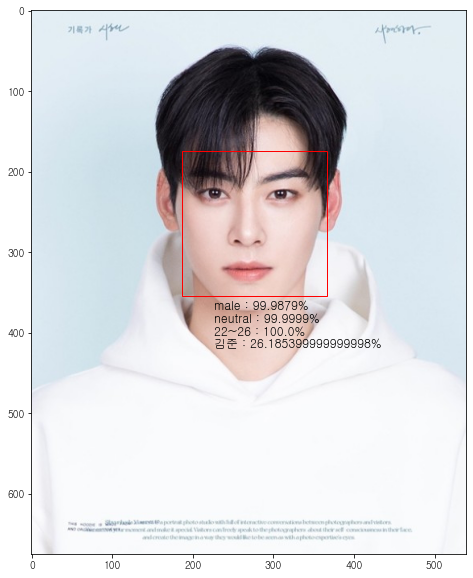

In [10]:
##########################실습##############################

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#  필요 모듈 읽어오기
import os
import sys
import requests
import json
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


# api 사용을 위한 개발자 정보
client_id = "C4DvW5_0_sswvHjIjjDS"
client_secret = "yz4fQiL721"

# 사용할 api 주소 선택
url = "https://openapi.naver.com/v1/vision/face"        # 얼굴감지
# url = "https://openapi.naver.com/v1/vision/celebrity"   # 유명인 얼굴인식

# 인식할 사진
file_name = 'love6.jpg'
files = {'image': open(file_name, 'rb')}

# id secret을 headers 딕셔너리로 변환
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }

# 위 정보들을 모두 api주소로 전송하려 결과를 response로 받음
response = requests.post(url,  files=files, headers=headers)
                    #  (정보를 전달할 주소, 전달할 사진, 개발자 id secret)

rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

parsed1 = json.loads(response.text)

# 사용할 api 주소 선택
# url = "https://openapi.naver.com/v1/vision/face"        # 얼굴감지
url = "https://openapi.naver.com/v1/vision/celebrity"   # 유명인 얼굴인식

# 인식할 사진
files = {'image': open(file_name, 'rb')}

# id secret을 headers 딕셔너리로 변환
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }

# 위 정보들을 모두 api주소로 전송하려 결과를 response로 받음
response = requests.post(url,  files=files, headers=headers)
                    #  (정보를 전달할 주소, 전달할 사진, 개발자 id secret)

rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

parsed2 = json.loads(response.text)



print(parsed1['info']['size'].values())

# 전체 정보 종합 추출

wi, he = parsed1['info']['size'].values()     # 딕셔너리는 기본적으로 순서가 없다. unordered
x, y, w, h = parsed1['faces'][0]['roi'].values()     # 딕셔너리는 기본적으로 순서가 없다. unordered
gender, gender_c = parsed1['faces'][0]['gender'].values()     # 딕셔너리는 기본적으로 순서가 없다. unordered
age, age_c = parsed1['faces'][0]['age'].values()     # 딕셔너리는 기본적으로 순서가 없다. unordered
emotion, emotion_c = parsed1['faces'][0]['emotion'].values()     # 딕셔너리는 기본적으로 순서가 없다. unordered
celebrity, celebrity_c = parsed2['faces'][0]['celebrity'].values()     # 딕셔너리는 기본적으로 순서가 없다. unordered



# 추출한 정보를 사진에 올리기 적합한 형태로 가공하자.

annot = gender + ' : ' + str(gender_c*100) +'%' + \
        '\n'+ emotion + ' : ' + str(emotion_c*100)+'%' + \
        '\n'+ age + ' : ' + str(age_c*100)+'%' + \
        '\n'+ celebrity + ' : ' + str(celebrity_c*100)+'%' + \
        '\n'

print(annot)




img = mpimg.imread(file_name)


fig, ax = plt.subplots(figsize=(10,10))     # fig 액자(?), ax 수정한 사진의 크기 결정
ax.imshow(img)                              # 먼저 기본사진

# 사진 수정
rect_face = patches.Rectangle((x,y),w,h,    # x,y 얼굴의 시작지점. w,h 얼굴의 크기
                            linewidth =1,
                            edgecolor = 'r',
                            facecolor = 'none')

ax.add_patch(rect_face)
plt.text(x+40,y+h+he*0.12,annot,fontsize = 12)
plt.show()





In [9]:
!pip install json

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


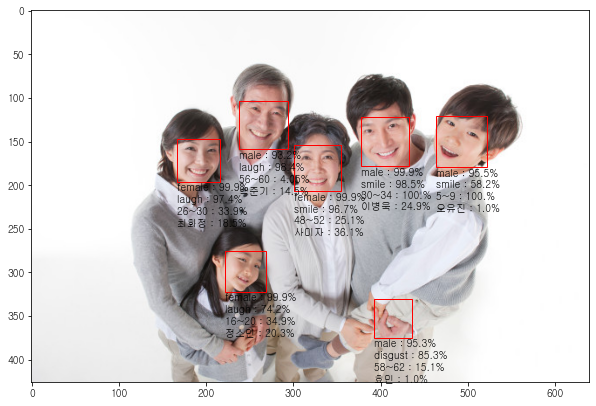

In [9]:
###

import os
import sys
import requests
import json


import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)



client_id = "C4DvW5_0_sswvHjIjjDS"
client_secret = "yz4fQiL721"

url1 = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
YOUR_FILE_NAME = 'family3.jpg'
files = {'image': open(YOUR_FILE_NAME, 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response1 = requests.post(url1,  files=files, headers=headers)

# rescode = response1.status_code
# if(rescode==200):
#     print (response1.text)
# else:
#     print("Error Code:" + rescode)

parsed = json.loads(response1.text)


url2 = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식
files = {'image': open(YOUR_FILE_NAME, 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response2 = requests.post(url2,  files=files, headers=headers)

# rescode = response2.status_code
# if(rescode==200):
#     print (response2.text)
# else:
#     print("Error Code:" + rescode)

parsed1 = json.loads(response2.text)


# img
img = mpimg.imread(YOUR_FILE_NAME)
fig, ax = plt.subplots(figsize=(10,10))     # fig 액자(?), ax 수정한 사진의 크기 결정
ax.imshow(img)                              # 먼저 기본사진
    
wi, he = parsed['info']['size'].values()   

for i in range(parsed['info']['faceCount']) :
    x, y, w, h = parsed['faces'][i]['roi'].values()   
    gender, gender_c = parsed['faces'][i]['gender'].values()     
    age, age_c = parsed['faces'][i]['age'].values()    
    emotion, emotion_c = parsed['faces'][i]['emotion'].values()     
    celebrity, celebrity_c = parsed1['faces'][i]['celebrity'].values()     


    # 1 추출한 정보를 사진에 올리기 적합한 형태로 가공하자.
    annot = gender + ' : ' + str(gender_c*100)[:4:] +'%' + \
            '\n'+ emotion + ' : ' + str(emotion_c*100)[:4:]+'%' + \
            '\n'+ age + ' : ' + str(age_c*100)[:4:]+'%' + \
            '\n'+ celebrity + ' : ' + str(celebrity_c*100)[:4:]+'%' + \
            '\n'
    # print(annot)

    # 2 사진 수정
    rect_face = patches.Rectangle((x,y),w,h,    # x,y 얼굴의 시작지점. w,h 얼굴의 크기
                                linewidth =1,
                                edgecolor = 'r',
                                facecolor = 'none')

    ax.add_patch(rect_face)
    plt.text(x,y+h+he*0.15,annot,fontsize = 10)


plt.show()
